In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pydotplus
import sys
import os
from IPython.display import Image 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
data = pd.read_csv('male.csv')
data

,age,face_score,height,weight,salary,category
0,18,100,183,70,9300.0,good
1,55,50,177,72,3720.0,poor
2,20,50,180,180,6510.0,poor
3,21,50,170,65,46500.0,good
4,25,50,174,63,10850.0,average
...,...,...,...,...,...,...
75,24,0,166,75,8370.0,poor
76,29,0,167,77,13020.0,poor
77,36,100,178,69,37200.0,good
78,35,0,167,72,11160.0,poor


In [6]:
X = data.iloc[:, : -1]
y = data["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

39       poor
41       poor
69    average
44       good
72       good
       ...   
13       poor
27       poor
48       poor
55    average
46    average
Name: category, Length: 64, dtype: object

In [7]:
clf = DecisionTreeClassifier(criterion="gini", class_weight=None, max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [8]:
clf.classes_

array(['average', 'good', 'poor'], dtype=object)

In [9]:
clf.score(X_test, y_test)

0.75

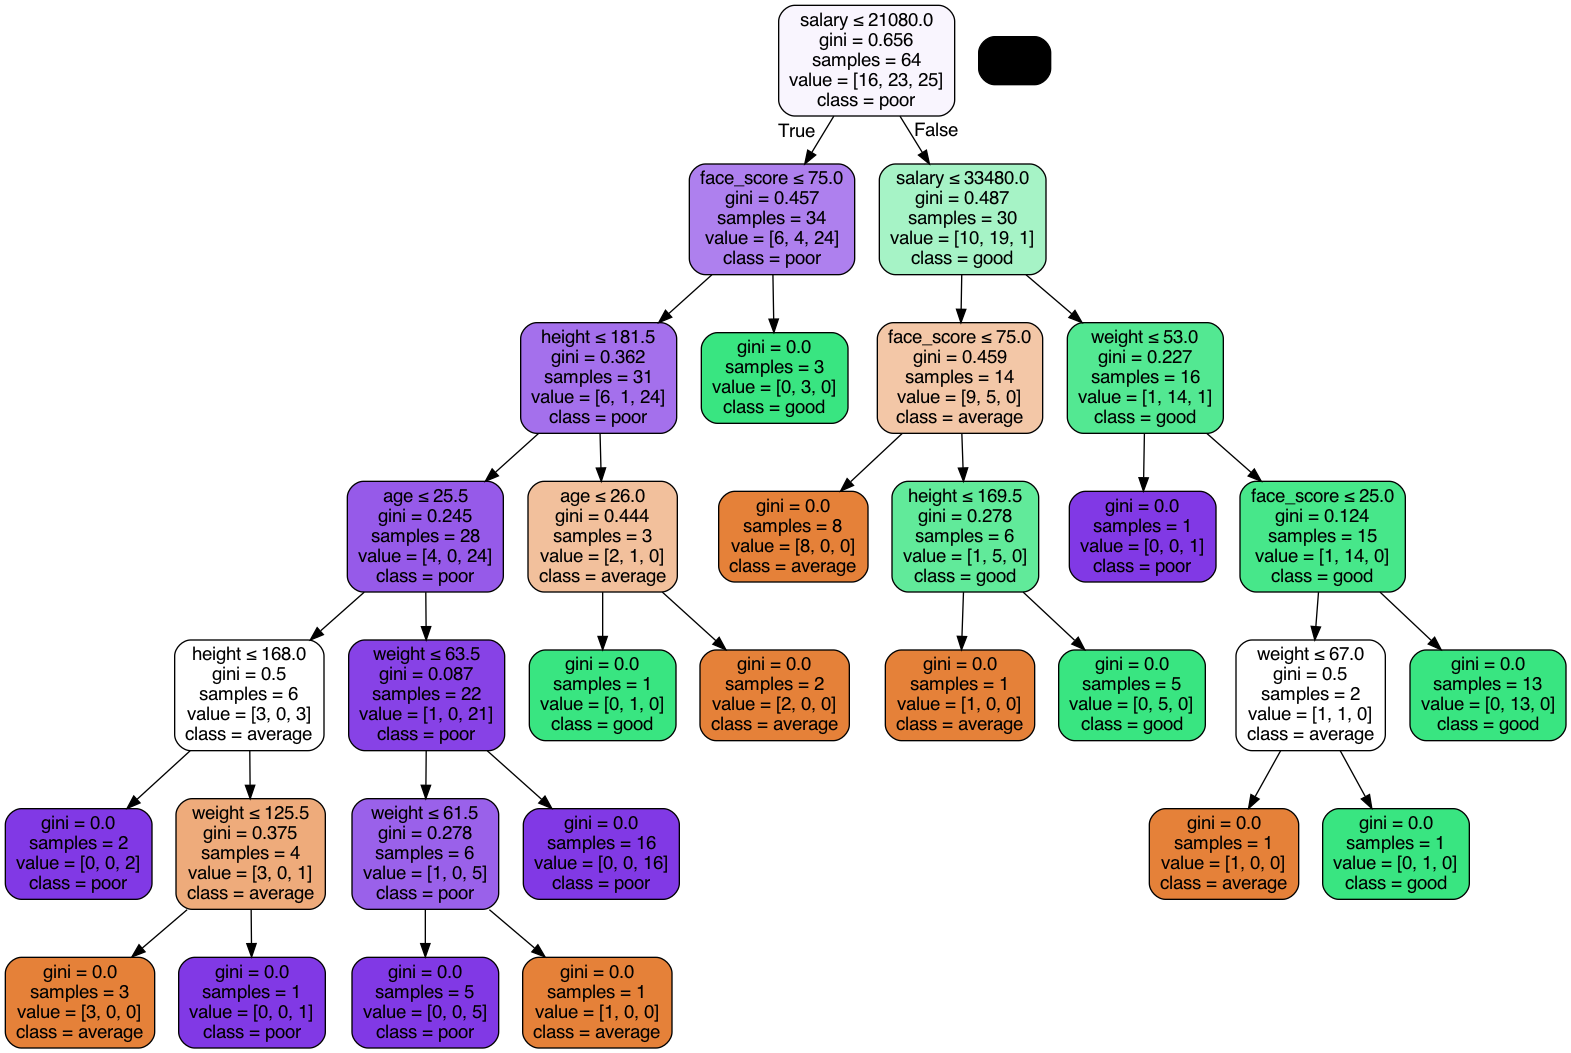

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["age", "face_score", "height", "weight", "salary"],  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 